In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#load initial csv
initial_data = pd.read_csv('Taxi_Trips.csv')

#show columns in initial dataset
print('Columns in initial dataframe')
print(initial_data.columns)

Columns in initial dataframe
Index(['Trip ID', 'Taxi ID', 'Trip Start Timestamp', 'Trip End Timestamp',
       'Trip Seconds', 'Trip Miles', 'Pickup Census Tract',
       'Dropoff Census Tract', 'Pickup Community Area',
       'Dropoff Community Area', 'Fare', 'Tips', 'Tolls', 'Extras',
       'Trip Total', 'Payment Type', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Pickup Centroid Location',
       'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude',
       'Dropoff Centroid  Location'],
      dtype='object')


In [2]:
#select desired rows
#Trip Start Timestamp, Trip End Timestamp, Trip Seconds, Trip Miles, Fare, Extras
#Company, Pickup Centroid Latitude, Pickup Centroid Longitude, Dropoff Centroid Latitude, Dropoff Centroid Longitude 

cab_fare_df = initial_data.iloc[: ,[2,3,4,5,10,13,16,17,18,20,21]].copy()
print('Columns in new cab fare dataframe')
print(cab_fare_df.columns)
#print(cab_fare_df.dtypes)
initial_rows = len(cab_fare_df)
print(f"Initial length of dataframe: {initial_rows}")

Columns in new cab fare dataframe
Index(['Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds',
       'Trip Miles', 'Fare', 'Extras', 'Company', 'Pickup Centroid Latitude',
       'Pickup Centroid Longitude', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude'],
      dtype='object')
Initial length of dataframe: 865247


In [3]:
#drop duplicates
cab_fare_df.drop_duplicates()

print(f"Length of dataframe after dropping duplicates: {len(cab_fare_df)}")

#check null values
print('Null values in columns')
print(cab_fare_df.isnull().sum())


Length of dataframe after dropping duplicates: 865247
Null values in columns
Trip Start Timestamp              0
Trip End Timestamp                8
Trip Seconds                    169
Trip Miles                        6
Fare                           2045
Extras                         2045
Company                           0
Pickup Centroid Latitude      22966
Pickup Centroid Longitude     22966
Dropoff Centroid Latitude     79675
Dropoff Centroid Longitude    79675
dtype: int64


In [4]:
#handle blank latitudes and longitudes by filling in with mean
 
cab_fare_df['Pickup Centroid Latitude'] = cab_fare_df['Pickup Centroid Latitude'].fillna(cab_fare_df['Pickup Centroid Latitude'].mean())

cab_fare_df['Pickup Centroid Longitude'] = cab_fare_df['Pickup Centroid Longitude'].fillna(cab_fare_df['Pickup Centroid Longitude'].mean())
cab_fare_df['Dropoff Centroid Latitude'] = cab_fare_df['Dropoff Centroid Latitude'].fillna(cab_fare_df['Dropoff Centroid Latitude'].mean())
cab_fare_df['Dropoff Centroid Longitude'] = cab_fare_df['Dropoff Centroid Longitude'].fillna(cab_fare_df['Dropoff Centroid Longitude'].mean())


In [5]:
#drop rows with NA values
print('Columns still containing null values')
print(cab_fare_df.isnull().sum())
cab_fare_df = cab_fare_df.dropna()
print(f"Length of dataframe after dropping NAs: {len(cab_fare_df)}")

Columns still containing null values
Trip Start Timestamp             0
Trip End Timestamp               8
Trip Seconds                   169
Trip Miles                       6
Fare                          2045
Extras                        2045
Company                          0
Pickup Centroid Latitude         0
Pickup Centroid Longitude        0
Dropoff Centroid Latitude        0
Dropoff Centroid Longitude       0
dtype: int64
Length of dataframe after dropping NAs: 863104


In [6]:
#Chicago coordinates: 41.8832° N, 87.6324° W
print(cab_fare_df['Pickup Centroid Latitude'].describe())
print(cab_fare_df['Pickup Centroid Longitude'].describe())
print(cab_fare_df['Dropoff Centroid Latitude'].describe())
print(cab_fare_df['Dropoff Centroid Longitude'].describe())
#min and max of all coordinates are appropriate 

count    863104.000000
mean         41.902210
std           0.065553
min          41.660136
25%          41.878866
50%          41.899156
75%          41.979071
max          42.021224
Name: Pickup Centroid Latitude, dtype: float64
count    863104.000000
mean        -87.704675
std           0.113971
min         -87.913625
25%         -87.756047
50%         -87.642808
75%         -87.626211
max         -87.534903
Name: Pickup Centroid Longitude, dtype: float64
count    863104.000000
mean         41.892118
std           0.056696
min          41.650222
25%          41.878866
50%          41.892124
75%          41.914616
max          42.021224
Name: Dropoff Centroid Latitude, dtype: float64
count    863104.000000
mean        -87.659563
std           0.064738
min         -87.913625
25%         -87.663416
50%         -87.642649
75%         -87.626211
max         -87.534903
Name: Dropoff Centroid Longitude, dtype: float64


In [7]:
#view trip seconds, miles, fare, and extras

print(cab_fare_df['Trip Seconds'].describe())
print(cab_fare_df['Trip Miles'].describe())
print(cab_fare_df['Fare'].describe())
print(cab_fare_df['Extras'].describe())
print(f"Current length of dataframe: {len(cab_fare_df)}")

count    863104.000000
mean       1150.637693
std        1585.144405
min           0.000000
25%         460.000000
50%         900.000000
75%        1591.000000
max       86340.000000
Name: Trip Seconds, dtype: float64
count    863104.000000
mean          6.561667
std           8.210153
min           0.000000
25%           0.910000
50%           3.070000
75%          11.710000
max        3093.470000
Name: Trip Miles, dtype: float64
count    863104.000000
mean         22.035414
std          22.482433
min           0.000000
25%           8.000000
50%          15.750000
75%          33.750000
max        9999.750000
Name: Fare, dtype: float64
count    863104.000000
mean          2.149265
std          19.320798
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        5051.100000
Name: Extras, dtype: float64
Current length of dataframe: 863104


In [8]:
#filter erroneous entries for miles, seconds, fare

cab_fare_df = cab_fare_df[(cab_fare_df['Trip Seconds']>60) & (cab_fare_df['Trip Miles']>0) & (cab_fare_df['Fare']>0)]
print(f"Length of dataframe after removing erroneous entries: {len(cab_fare_df)}")


Length of dataframe after removing erroneous entries: 767314


In [9]:
#filter outliers for seconds and miles 

#define a function to return the low and high thresholds for outliers
def find_outliers(df_column):
    q1 = df_column.quantile(0.25)
    q3 = df_column.quantile(0.75)
    iqr = q3 - q1
    low = float(q1 - (1.5*iqr))
    high = float(q3 + (1.5*iqr))
    return low, high

#define a function to find the percentage of values in a column that are outliers
def find_percent_outliers(df_column):
    low, high = find_outliers(df_column)
    prop_outliers = 1-(df_column.between(low, high).sum()/len(df_column))
    percent_outlier = prop_outliers*100
    return percent_outlier

print(f"Percent of Trip Seconds that are outliers: {round(find_percent_outliers(cab_fare_df['Trip Seconds']),4)}%")
print(f"Percent of Trip Miles that are outliers: {round(find_percent_outliers(cab_fare_df['Trip Miles']),4)}%")

#since %outliers is so low, we can filter out outliers for seconds and miles
s_low, s_high = find_outliers(cab_fare_df['Trip Seconds'])
cab_fare_df = cab_fare_df[cab_fare_df['Trip Seconds'].between(s_low, s_high)]

m_low, m_high = find_outliers(cab_fare_df['Trip Miles'])
cab_fare_df = cab_fare_df[cab_fare_df['Trip Miles'].between(m_low, m_high)]

print(f"Length of dataframe after filtering outliers: {len(cab_fare_df)}")
    

Percent of Trip Seconds that are outliers: 2.3148%
Percent of Trip Miles that are outliers: 0.7134%
Length of dataframe after filtering outliers: 745357


In [10]:
#calculating % dropped
cleaned_rows = len(cab_fare_df)
dropped_rows = initial_rows - cleaned_rows
percent_dropped = round(dropped_rows/initial_rows,4)*100
print(f"Initial number of rows: {initial_rows}")
print(f"Final number of rows after cleaning: {cleaned_rows}")
print(f"Percent of dataset dropped: {percent_dropped}%")

Initial number of rows: 865247
Final number of rows after cleaning: 745357
Percent of dataset dropped: 13.86%


In [11]:
#sum fare and extras columns 
cab_fare_df['Trip Cost'] = cab_fare_df['Fare'] + cab_fare_df['Extras']

In [12]:
#convert pickup timestamp column

cab_fare_df['Trip Start Timestamp'] = pd.to_datetime(cab_fare_df['Trip Start Timestamp'], format="%m/%d/%Y %I:%M:%S %p")
#cab_fare_df['Trip End Timestamp'] = pd.to_datetime(cab_fare_df['Trip End Timestamp'])

#create month column 
cab_fare_df['Month'] = cab_fare_df['Trip Start Timestamp'].dt.month

#create hour column
cab_fare_df['Hour'] = cab_fare_df['Trip Start Timestamp'].dt.hour 


In [13]:
print(cab_fare_df.dtypes)

Trip Start Timestamp          datetime64[ns]
Trip End Timestamp                    object
Trip Seconds                         float64
Trip Miles                           float64
Fare                                 float64
Extras                               float64
Company                               object
Pickup Centroid Latitude             float64
Pickup Centroid Longitude            float64
Dropoff Centroid Latitude            float64
Dropoff Centroid Longitude           float64
Trip Cost                            float64
Month                                  int32
Hour                                   int32
dtype: object


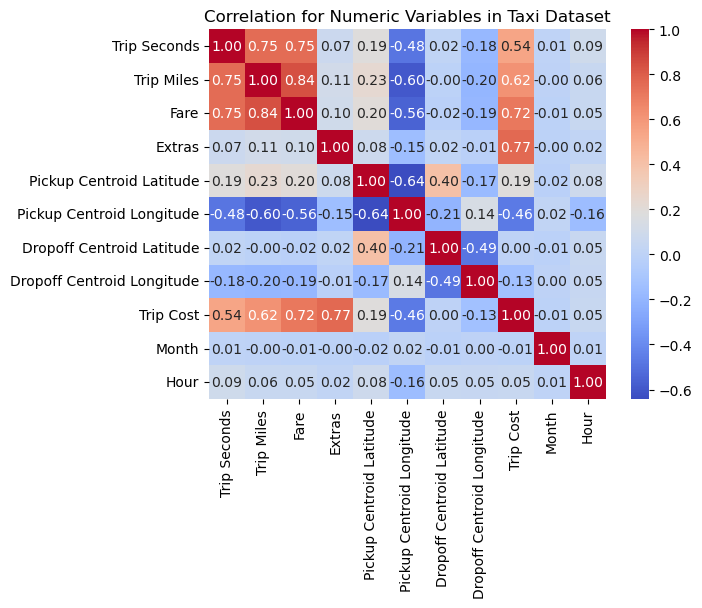

In [14]:
#correlation matrix for numeric variables
correlation = cab_fare_df.corr(numeric_only=True)
#print(correlation)

#heatmap of correlation matrix
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation for Numeric Variables in Taxi Dataset')
plt.show()

Looking at the correlation matrix heatmap, the variables most highly associated with the dependent variable, trip cost, are seconds, miles, pickup longitude. Fare and extras are associated with cost because those were the two variables summed to calculate cost. 

There are very weak associations between trip cost and the pickup month and hour. There is no observed association between cost and dropoff latitude. 

In [16]:
#view all taxi companies

all_companies = cab_fare_df['Company'].unique()
print(all_companies, len(all_companies))

['Taxi Affiliation Services' 'City Service' 'Sun Taxi' '5 Star Taxi'
 'Blue Ribbon Taxi Association' 'Chicago City Taxi Association'
 'Globe Taxi' 'Flash Cab' 'Taxicab Insurance Agency Llc'
 'Chicago Independents' 'Medallion Leasin' 'Taxicab Insurance Agency, LLC'
 '312 Medallion Management Corp' 'Top Cab'
 'Patriot Taxi Dba Peace Taxi Associat' 'Choice Taxi Association'
 'U Taxicab' 'Choice Taxi Association Inc' 'Tac - Yellow Cab Association'
 'Petani Cab Corp' 'Chicago Taxicab' 'Metro Jet Taxi A.'
 'Tac - Checker Cab Dispatch' 'Setare Inc' 'Koam Taxi Association'
 '3591 - 63480 Chuks Cab' '4623 - 27290 Jay Kim' '2733 - 74600 Benny Jona'
 '6574 - Babylon Express Inc.' '3556 - 36214 RC Andrews Cab'
 '5167 - 71969 5167 Taxi Inc' '4787 - 56058 Reny Cab Co'
 '4053 - 40193 Adwar H. Nikola' 'Blue Ribbon Taxi Association Inc.'
 'Taxi Affiliation Services Llc - Yell' 'Star North Taxi Management Llc'] 36
